In [12]:
import cv2
import matplotlib.pyplot as plt

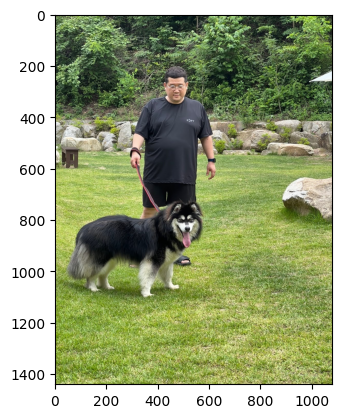

In [13]:
img1 = cv2.imread('../EDA/data/dog_and_pinkwink.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

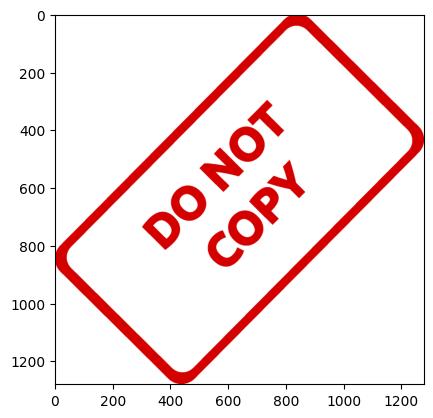

In [70]:
img2 = cv2.imread('../EDA/data/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2);

In [15]:
img1.shape, img2.shape # 두 이미지 크기가 다르다.

((1440, 1080, 3), (1280, 1277, 3))

In [16]:
blended = cv2.addWeighted(src1 = img1, alpha = 0.5, src2 =img2, beta = 0.5, gamma =0)
plt.imshow(blended); # 사진 크기가 맞지 않으니 에러가 난다.

error: OpenCV(4.8.0) /io/opencv/modules/core/src/arithm.cpp:647: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


In [17]:
img2 = cv2.resize(img2,(img1.shape[1], img1.shape[0]))
img1.shape, img2.shape # 사이즈를 맞추어서 해야 된다.

((1440, 1080, 3), (1440, 1080, 3))

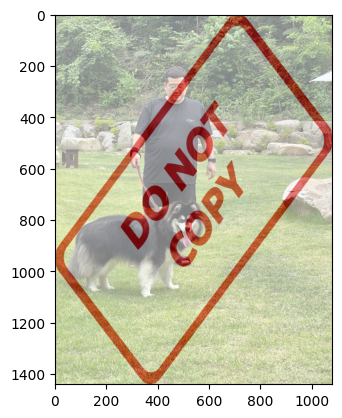

In [18]:
blended = cv2.addWeighted(src1 = img1, alpha = 0.5, src2 =img2, beta = 0.5, gamma =0)
plt.imshow(blended);

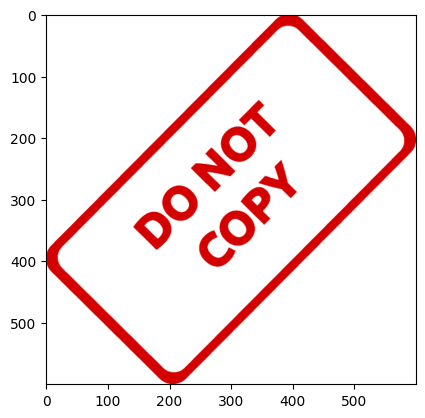

In [19]:
img2 = cv2.resize(img2,(600,600))
plt.imshow(img2);

In [20]:
large_img = img1
small_img = img2

x_offset = 0
y_offset = 0
#초기화하여 

In [21]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

large_img[y_offset:y_end, x_offset:x_end] = small_img

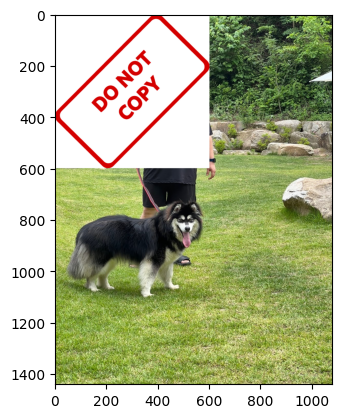

In [22]:
plt.imshow(large_img);

In [23]:
img1 = cv2.imread('../EDA/data/dog_and_pinkwink.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../EDA/data/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2,(600,600))

img1.shape,img2.shape

((1440, 1080, 3), (600, 600, 3))

In [24]:
x_offset =img1.shape[1]-img2.shape[1]
y_offset =img1.shape[0]-img2.shape[0]
x_offset, y_offset

(480, 840)

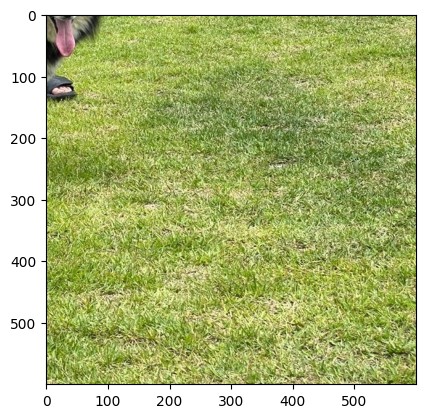

In [27]:
roi = img1[y_offset:img1.shape[0],x_offset:img1.shape[1]]
plt.imshow(roi);#관심 영역(Region of Interest, ROI)을 추출하고, 이 추출된 ROI를 plt.imshow()를 사용하여 표시하는 코드입니다

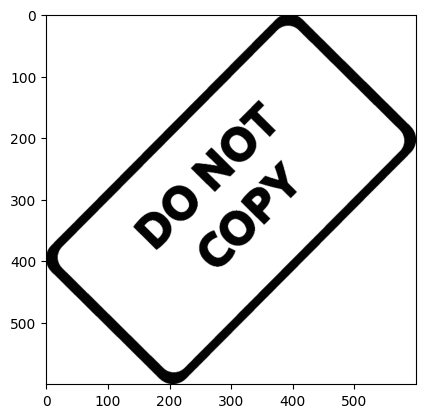

In [30]:
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2_gray, cmap = 'gray');

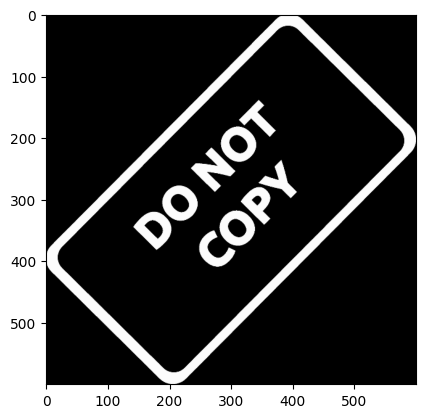

In [43]:
mask_inv = cv2.bitwise_not(img2_gray)
plt.imshow(mask_inv , cmap = 'gray');

In [44]:
mask_inv.shape

(600, 600)

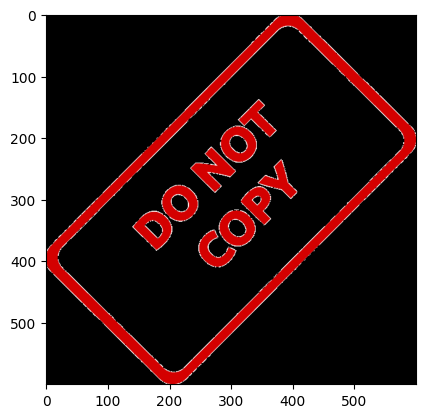

In [45]:
fg = cv2.bitwise_or(img2,img2,mask = mask_inv)
plt.imshow(fg)

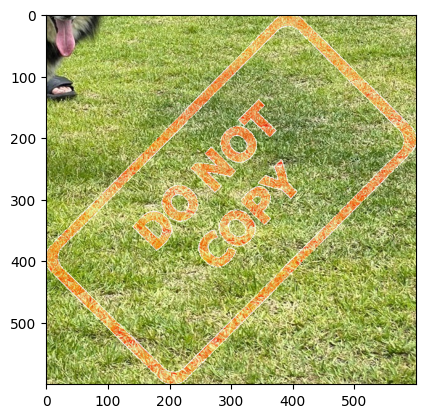

In [46]:
final_roi = cv2.bitwise_or(roi, fg)
plt.imshow(final_roi);

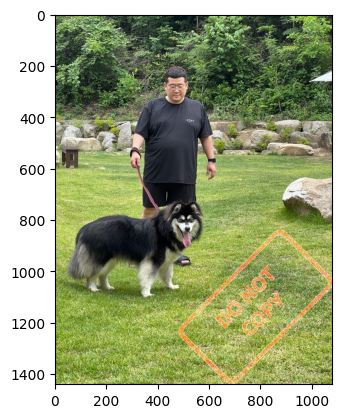

In [47]:
img1[y_offset:y_offset+img2.shape[0],x_offset:x_offset+img2.shape[1]] =final_roi
plt.imshow(img1);

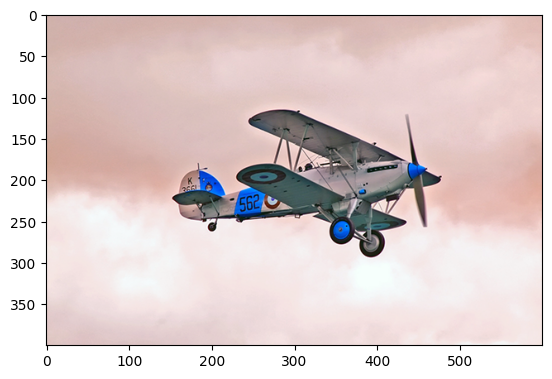

In [68]:
src = cv2.imread('../EDA/data/airplane.bmp',cv2.IMREAD_COLOR)
plt.imshow(src);

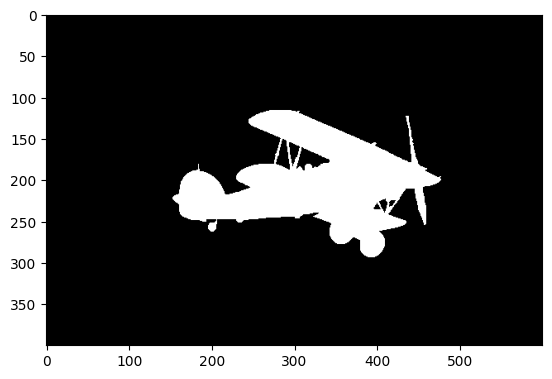

In [49]:
mask = cv2.imread('../EDA/data/mask_plane.bmp',cv2.IMREAD_GRAYSCALE)
plt.imshow(mask, cmap = 'gray');

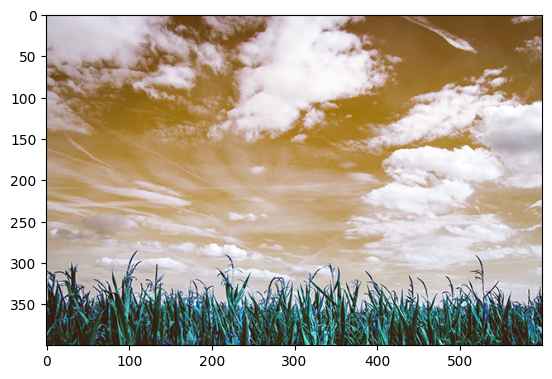

In [63]:
dst = cv2.imread('../EDA/data/field.bmp',cv2.IMREAD_COLOR)
plt.imshow(dst);

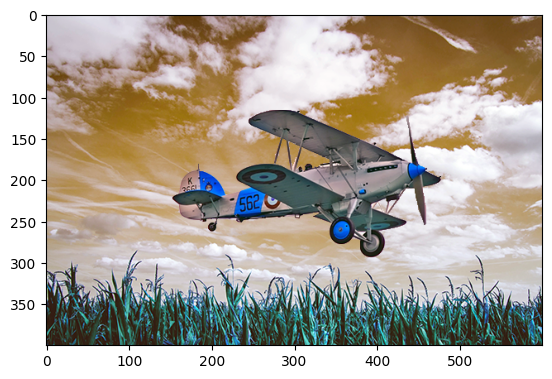

In [69]:
plt.imshow(cv2.copyTo(src, mask, dst));

# 히스토그램

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [66]:
dark_horse = cv2.imread('../EDA/data/horse.jpg')
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread('../EDA/data/rainbow.jpg')
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

bricks = cv2.imread('../EDA/data/bricks.jpg')
show_bricks = cv2.cvtColor(bricks, cv2.COLOR_BGR2RGB)

In [67]:
hist_values = cv2.calcHist([show_bricks],channels=[0],
                          mask=None, histSize=[256], ranges=[0,256])
hist_values.shape


(256, 1)

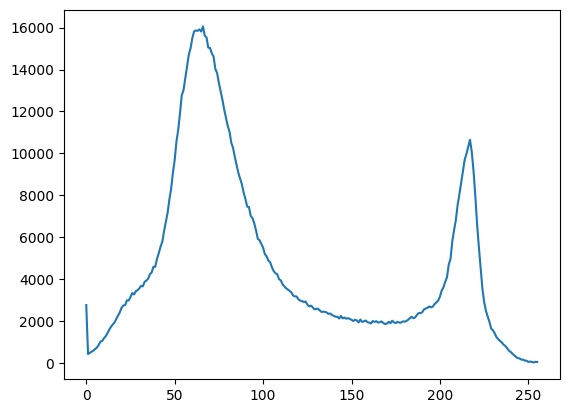

In [68]:
plt.plot(hist_values);

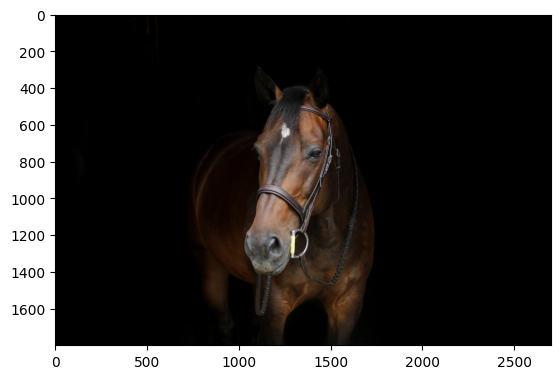

In [69]:
plt.imshow(show_horse);


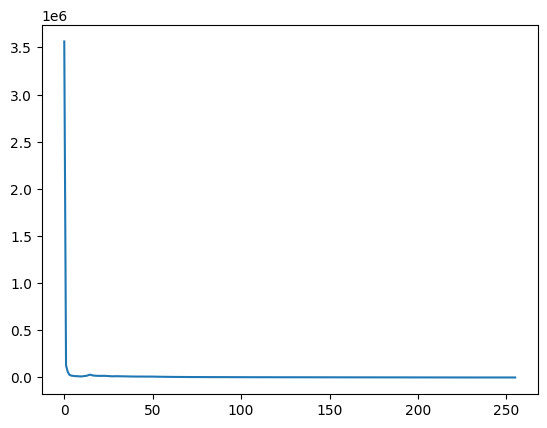

In [71]:
hist_values = cv2.calcHist([show_horse],channels=[0],
                          mask=None, histSize=[256], ranges=[0,256])
plt.plot(hist_values);

In [77]:
def show_histogram(img, title, xmax, ymax =None):
    color = ('b','g','r')
    for i, clr in enumerate(color):
        histr = cv2.calcHist([img],channels=[i],
                             mask = None, histSize=[256], ranges=[0,256])
        plt.plot(histr, color = clr)
        plt.xlim([0, xmax])
        if ymax != None:
            plt.ylim([0,ymax])
    plt.title(title)

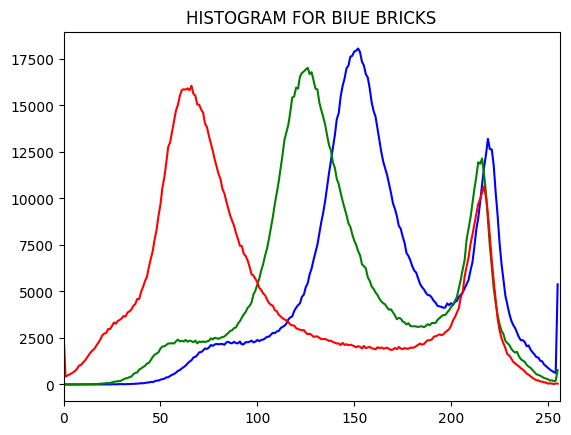

In [78]:
show_histogram(bricks, 'HISTOGRAM FOR BIUE BRICKS', 256)

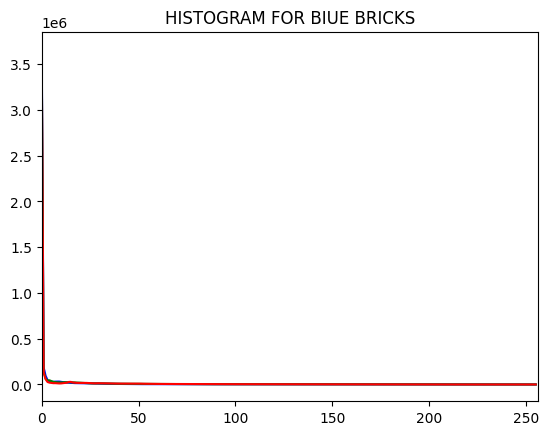

In [79]:
show_histogram(dark_horse, 'HISTOGRAM FOR BIUE BRICKS', 256)

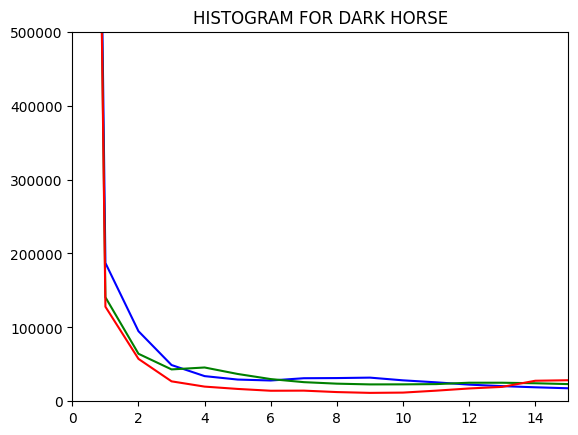

In [81]:
show_histogram(dark_horse, 'HISTOGRAM FOR DARK HORSE', 15, 500000)

In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [83]:
def display_img(img,cmap = None):
    fig = plt.figure(figsize =(8,6))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

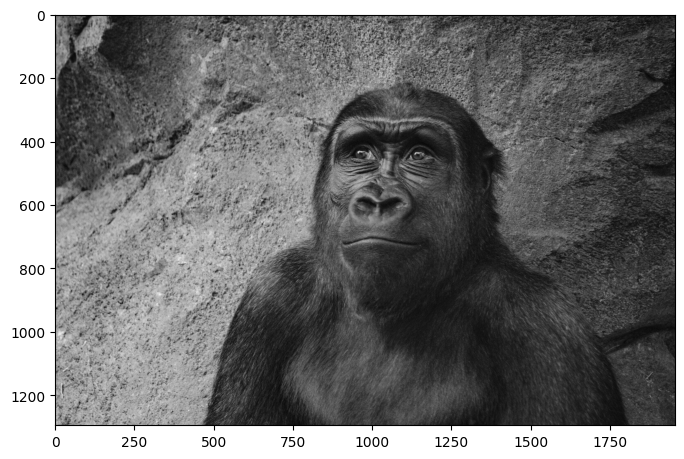

In [84]:
gorilla = cv2.imread('../EDA/data/gorilla.jpg', cv2.IMREAD_GRAYSCALE)
display_img(gorilla, cmap = 'gray')

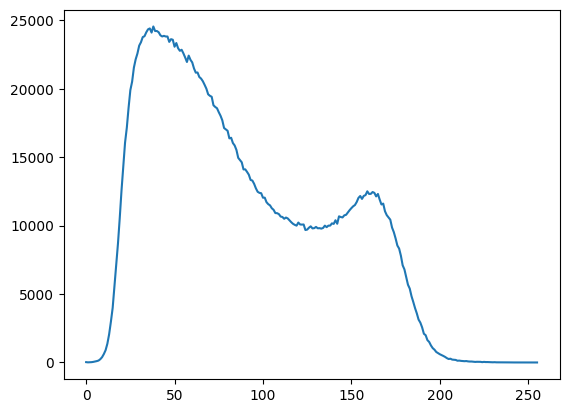

In [85]:
hist_values = cv2.calcHist([gorilla], channels= [0], mask=None,
                           histSize=[256],ranges=[0,256])
plt.plot(hist_values);

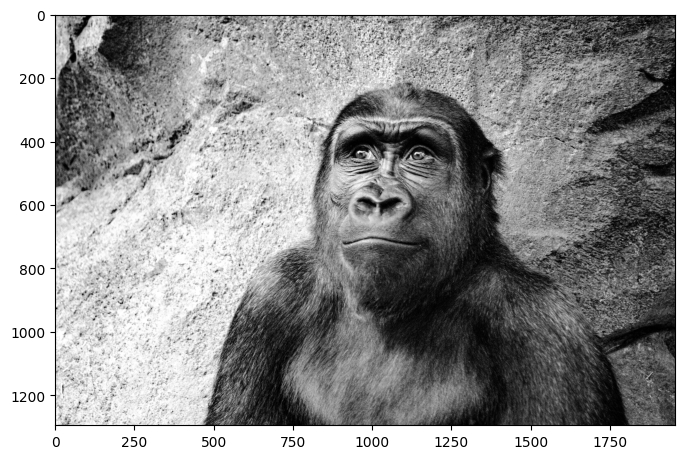

In [86]:
eq_gorilla = cv2.equalizeHist(gorilla)
display_img(eq_gorilla, cmap = 'gray')

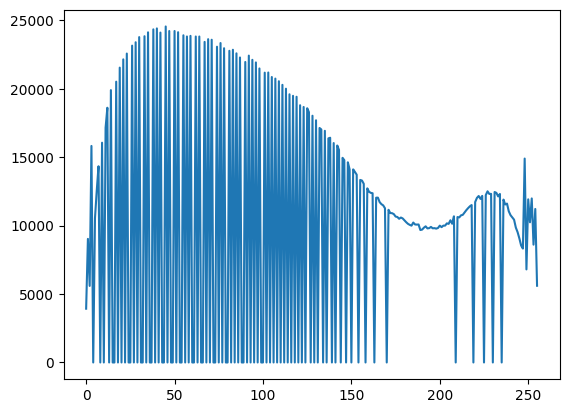

In [87]:
hist_values = cv2.calcHist([eq_gorilla], channels=[0], mask =None,
                           histSize=[256], ranges=[0,256])
plt.plot(hist_values)

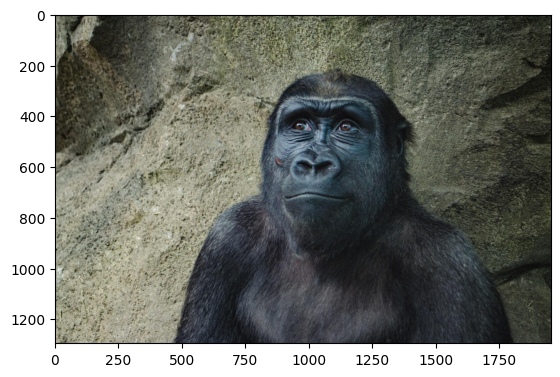

In [90]:
colour_gorilla = cv2.imread('../EDA/data/gorilla.jpg')
show_colour_gorilla = cv2.cvtColor(colour_gorilla, cv2.COLOR_BGR2RGB)
plt.imshow(show_colour_gorilla);

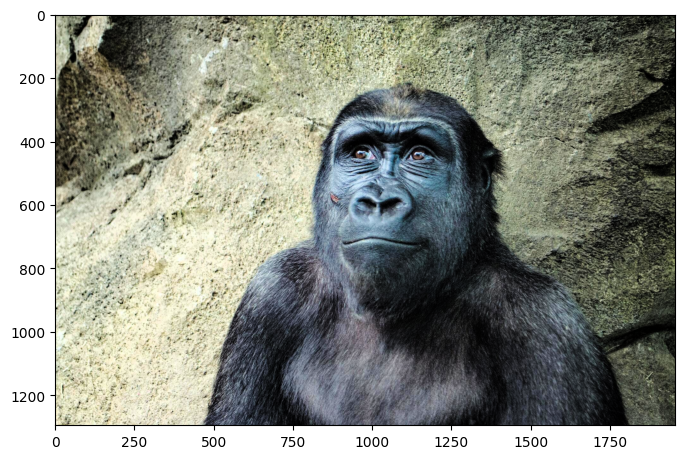

In [95]:
hsv = cv2.cvtColor(colour_gorilla, cv2.COLOR_BGR2HSV)
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])
equalized_colour_gorilla = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
display_img(equalized_colour_gorilla)

In [1]:
import sys
import numpy as np
import cv2
src = cv2.imread('../EDA/data/lenna.bmp', cv2.IMREAD_GRAYSCALE)
if src is None:
    print('Image load failed!')
    sys.exit()
dst1 = cv2.add(src, 100)
dst2 = np.clip(src + 100., 0, 255).astype(np.uint8)
cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
src = cv2.imread('../EDA/data/lenna.bmp')
if src is None:
    print('Image load failed!')
    sys.exit()
dst1 = cv2.add(src, (100, 100, 100, 0))
dst2 = np.clip(src + 100., 0, 255).astype(np.uint8)
cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2 ', dst2)
cv2.waitKey()
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/kang/venv/opencv/lib/python3.10/site-packages/cv2/qt/plugins"


In [ ]:
src = cv2.imread('../EDA/data/lenna.bmp',cv2.IMREAD_GRAYSCALE)
dst1 =cv2.add(src,100)
dst2 = src + 100

In [ ]:
src = cv2.imread('../EDA/data/lenna.bmp')
dst1 = cv2.add(src(100,100,100,0))
dst2 = np.clip(src + 100.,0, 255).astype(np.unit8)

In [2]:
import sys
import numpy as np
import cv2
src = cv2.imread('../EDA/data/lenna.bmp', cv2.IMREAD_GRAYSCALE)
if src is None:
    print('Image load failed!')
    sys.exit()
alpha = 1.0
dst = np.clip((1+alpha)*src - 128*alpha, 0, 255).astype(np.uint8) # 
cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [51]:
import sys
import numpy as np
import cv2
src = cv2.imread('../EDA/data/Hawkes.jpg', cv2.IMREAD_GRAYSCALE)
if src is None:
    print('Image load failed!')
    sys.exit()
dst = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)
cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [10]:
import sys
import numpy as np
import cv2
#src = cv2.imread('../EDA/data/candies.png')
src = cv2.imread('../EDA/data/candies2.png')
if src is None:
    print('Image load failed!')
    sys.exit()
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
dst1 = cv2.inRange(src, (0, 128, 0), (100, 255, 100))
dst2 = cv2.inRange(src_hsv, (50, 150, 0), (80, 255, 255))
cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
 a = input('글자를 입력하세요:')
 print(a*2)

안녕안녕


In [5]:
b = input('숫자를 입력하세요 :')
num = int(b)+10
print(num)

40


In [8]:
c = input("숫자를 입력하세요:")

if int(c) %2 ==0:
    print("짝수입니다")
else:
    print("홀수입니다")

홀수입니다
